In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor , plot_tree

In [6]:
np.random.seed(42)
x = np.random.rand(100 , 1) - 0.5
y = 3 * x[: , 0] ** 2 + 0.05 * np.random.randn(100)

x.shape , y.shape

((100, 1), (100,))

In [7]:
x

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [8]:
y

array([ 5.15728987e-02,  5.94479790e-01,  1.66051606e-01, -7.01779562e-02,
        3.43985933e-01,  3.72874939e-01,  6.59764984e-01,  3.76341398e-01,
       -9.75194335e-03,  1.04794741e-01,  7.35287787e-01,  6.78883363e-01,
        3.05066318e-01,  2.73909733e-01,  3.08559932e-01,  3.49130363e-01,
        7.98606436e-02, -1.45444646e-02, -5.71096619e-03,  5.75800683e-02,
        5.23392240e-02,  4.02946793e-01,  1.29867214e-01,  4.18481141e-02,
       -6.49789982e-02,  2.22943721e-01,  2.53451786e-01, -3.95060058e-02,
        1.75570720e-02,  6.37324227e-01,  1.29006981e-01,  3.34391950e-01,
        5.80417870e-01,  6.00772381e-01,  5.54501010e-01,  2.84001079e-01,
        1.17538848e-01,  6.08765289e-01,  9.22073759e-02,  2.58225391e-02,
        4.26829699e-01, -5.83641153e-02,  7.07523289e-01,  5.40226226e-01,
        2.14112889e-01,  3.37711060e-02,  1.76497872e-01, -6.88843767e-02,
        3.58884053e-02,  4.07472924e-01,  6.12002352e-01,  1.98779325e-01,
        5.84460527e-01,  

In [10]:
df = pd.DataFrame()

In [11]:
df['x'] = x.reshape(100)
df['y'] = y

In [12]:
df

,x,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


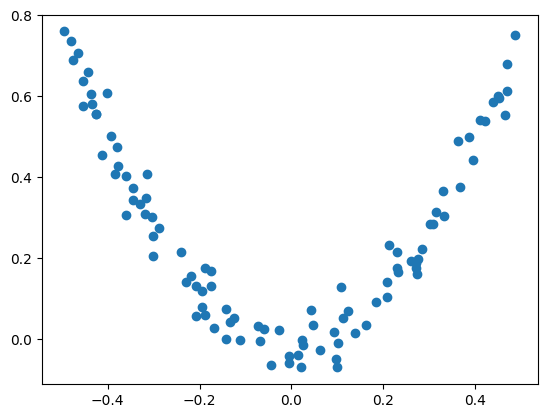

In [13]:
plt.scatter(df['x'] , df['y'])

In [16]:
# first model has mean of target column
df['pred1'] = df['y'].mean()

In [17]:
df

,x,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [18]:
# finding first PSEUDO RESIDUAL = actual - predicted
df['res1'] = df['y'] - df['pred1']

In [19]:
df

,x,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


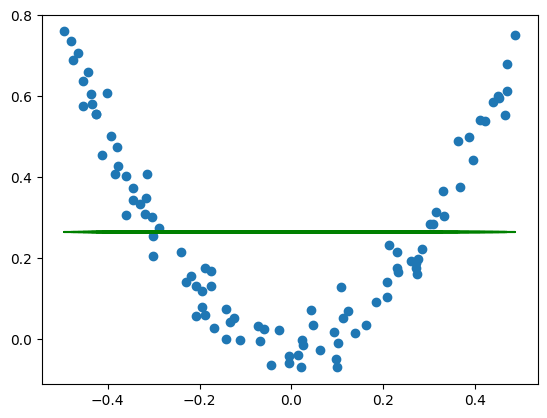

In [21]:
plt.scatter(df['x'] , df['y'])
plt.plot(df['x'] , df['pred1'] , color = 'green')

In [23]:
# max_leaf_nodes lies between 8 to 32 for best result
tree1 = DecisionTreeRegressor(max_leaf_nodes = 8 )

In [25]:
# training second model with x and residual of first model
tree1.fit(df['x'].values.reshape(100,1), df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

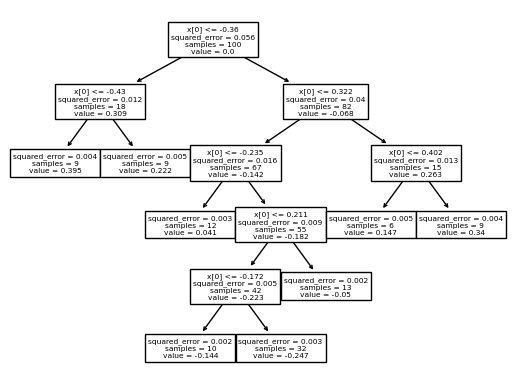

In [28]:
plot_tree(tree1)
plt.show()

In [30]:
# generating x test
x_test = np.linspace(-0.5 , 0.5 ,500)
x_test.shape

(500,)

In [31]:
df['y'].mean()

0.26545839669679816

In [33]:
# prediction = m1 + m2
y_pred = df['y'].mean() + tree1.predict(x_test.reshape(500,1))

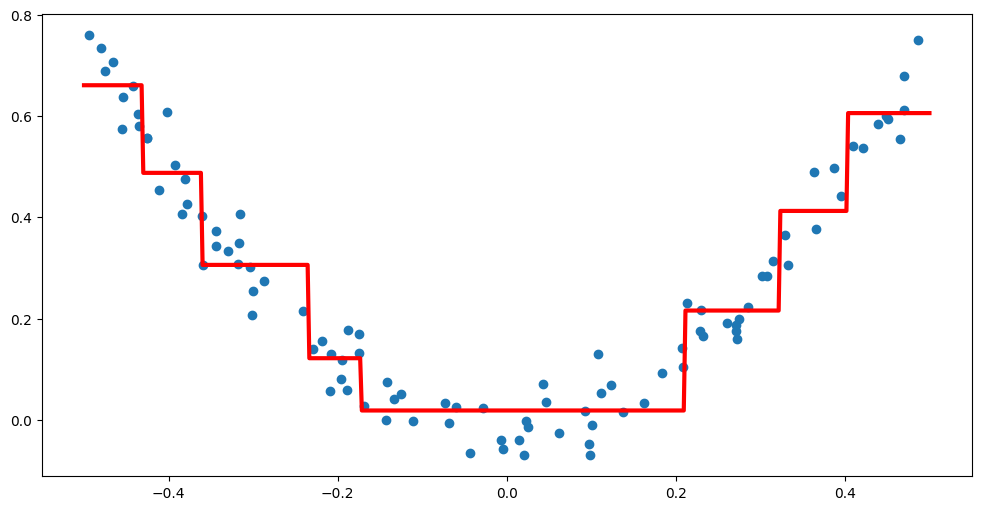

In [39]:
plt.figure(figsize = (12,6))
plt.scatter(df['x'] , df['y'])
plt.plot(x_test , y_pred , linewidth = 3, color = 'red')

In [40]:
df['pred2'] = df['y'].mean() + tree1.predict(df['x'].values.reshape(100,1))

In [41]:
df

,x,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018320
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018320
4,-0.343981,0.343986,0.265458,0.078528,0.305965
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018320
96,0.022733,-0.002305,0.265458,-0.267763,0.018320
97,-0.072459,0.032809,0.265458,-0.232650,0.018320
98,-0.474581,0.689516,0.265458,0.424057,0.660912


In [69]:
# wrong why ? don't know
# df['res2'] = df['y'] - (df['pred1'] + df['pred2'])

In [70]:
df['res2'] = df['y'] - df['pred2']

In [71]:
df

,x,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018320,0.033253
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018320,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305965,0.038021
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018320,-0.058995
96,0.022733,-0.002305,0.265458,-0.267763,0.018320,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018320,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028603


In [72]:
# training 3rd model
tree2 = DecisionTreeRegressor(max_leaf_nodes = 8)

In [73]:
tree2.fit(df['x'].values.reshape(100,1) , df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [76]:
y_pred = df['y'].mean() + tree1.predict(x_test.reshape(500,1)) + tree2.predict(x_test.reshape(500,1))

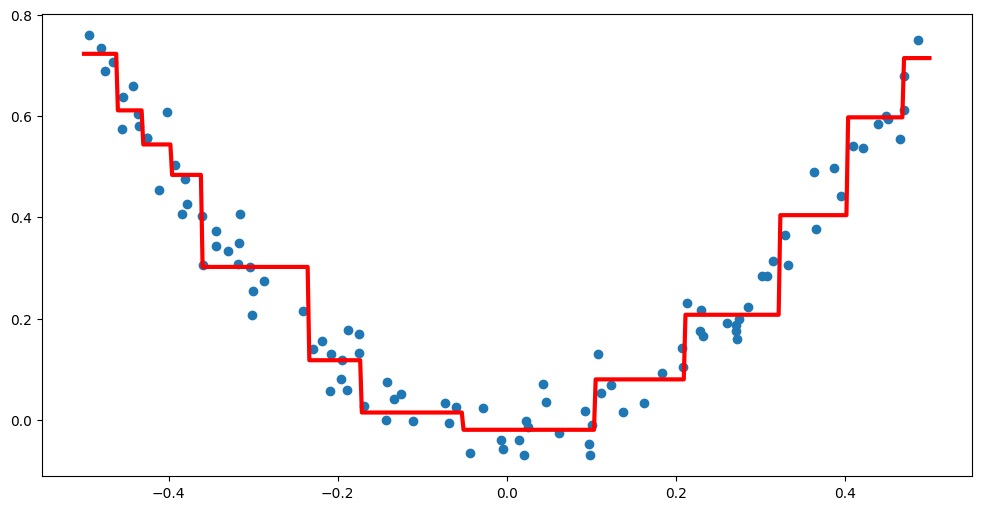

In [77]:
plt.figure(figsize=(12,6))
plt.scatter(df['x'] , df['y'])
plt.plot(x_test , y_pred , linewidth = 3 , color = 'red')

In [78]:
def gradient_boost(x,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(x)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(x, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(x[:, 0], foo,"r.")
    plt.show()

    gradient_boost(x,y,number-1,lr,count+1,regs,foo=foo)

5


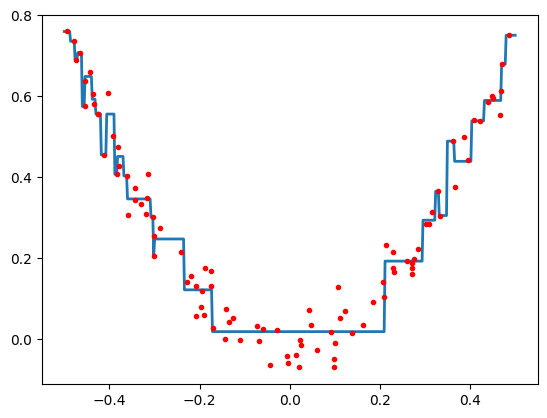

4


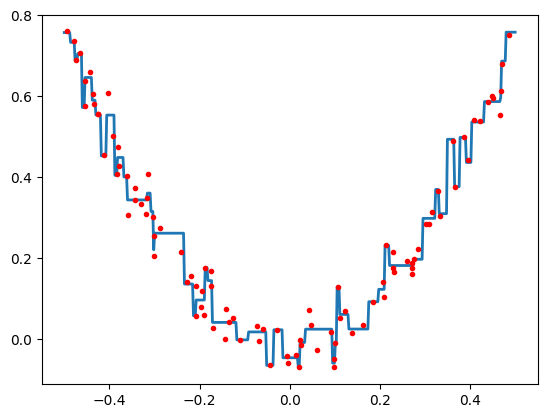

3


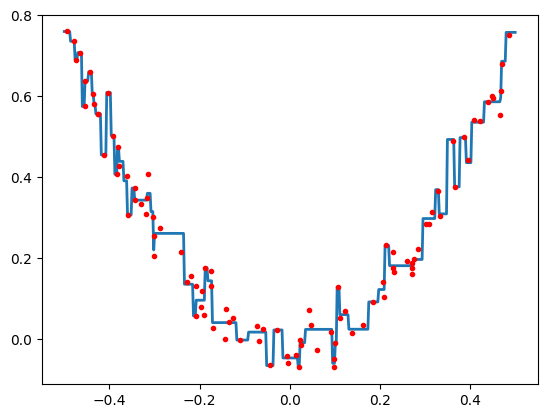

2


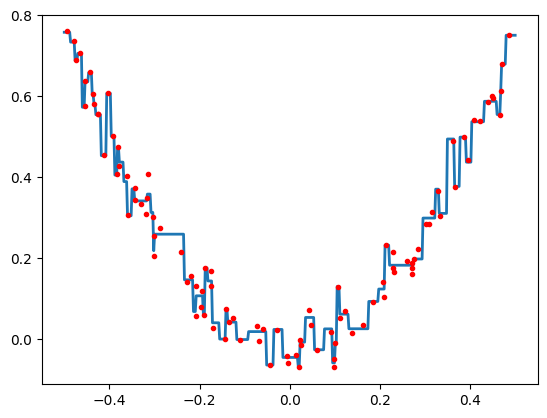

1


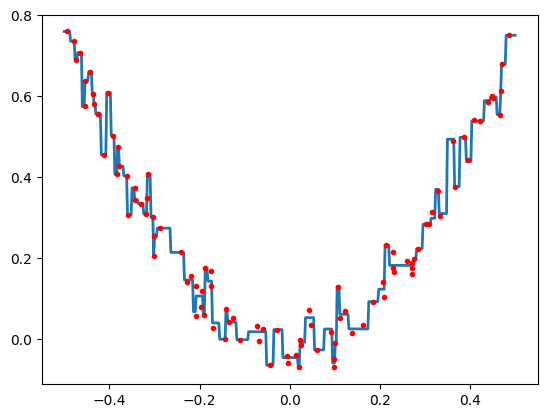

In [79]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,5,lr=1)